## Explanatory Analysis

Climate dataset in Surabaya from January 2013 until May 2021.

In [1]:
import pandas as pd

df = pd.read_csv("Climate_Sby_2013-2021.csv")

df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2013,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,02-01-2013,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,03-01-2013,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,04-01-2013,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,05-01-2013,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W


In [2]:
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3068,27-05-2021,27.4,34.2,30.2,76.0,0.0,6.7,5.0,140.0,3.0,SE
3069,28-05-2021,26.1,34.0,28.1,82.0,8888.0,8.3,6.0,150.0,2.0,E
3070,29-05-2021,25.8,35.0,30.6,75.0,5.4,4.5,5.0,30.0,1.0,C
3071,30-05-2021,26.7,33.0,28.9,81.0,0.0,9.2,4.0,80.0,1.0,C
3072,31-05-2021,26.6,33.7,29.3,78.0,3.5,2.7,3.0,130.0,2.0,E


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  3073 non-null   object 
 1   Tn       3050 non-null   float64
 2   Tx       3049 non-null   float64
 3   Tavg     3055 non-null   float64
 4   RH_avg   3055 non-null   float64
 5   RR       2643 non-null   float64
 6   ss       3026 non-null   float64
 7   ff_x     3057 non-null   float64
 8   ddd_x    3057 non-null   float64
 9   ff_avg   3057 non-null   float64
 10  ddd_car  3057 non-null   object 
dtypes: float64(9), object(2)
memory usage: 264.2+ KB


## Feature Engineering

### Handle Missing Value

In [5]:
df = df.fillna(method ='pad')

In [6]:
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
3068,27-05-2021,27.4,34.2,30.2,76.0,0.0,6.7,5.0,140.0,3.0,SE
3069,28-05-2021,26.1,34.0,28.1,82.0,8888.0,8.3,6.0,150.0,2.0,E
3070,29-05-2021,25.8,35.0,30.6,75.0,5.4,4.5,5.0,30.0,1.0,C
3071,30-05-2021,26.7,33.0,28.9,81.0,0.0,9.2,4.0,80.0,1.0,C
3072,31-05-2021,26.6,33.7,29.3,78.0,3.5,2.7,3.0,130.0,2.0,E


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  3073 non-null   object 
 1   Tn       3073 non-null   float64
 2   Tx       3073 non-null   float64
 3   Tavg     3073 non-null   float64
 4   RH_avg   3073 non-null   float64
 5   RR       3073 non-null   float64
 6   ss       3073 non-null   float64
 7   ff_x     3073 non-null   float64
 8   ddd_x    3073 non-null   float64
 9   ff_avg   3073 non-null   float64
 10  ddd_car  3073 non-null   object 
dtypes: float64(9), object(2)
memory usage: 264.2+ KB


Convert Tanggal column type to datetime

In [22]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')

dataset = pd.read_csv('Climate_Sby_2013-2021.csv', header=0, parse_dates=[0], date_parser=dateparse)

dataset = dataset.fillna(method ='pad')

dataset.head(15)

/home/aifajar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2013-01-01,24.0,34.3,27.6,85.0,42.2,2.0,11.0,280.0,3.0,W
1,2013-01-02,24.0,32.6,27.7,86.0,99.1,5.0,12.0,280.0,4.0,W
2,2013-01-03,26.0,32.9,28.2,83.0,68.0,0.1,9.0,280.0,3.0,W
3,2013-01-04,25.0,32.8,28.1,82.0,0.0,2.3,8.0,270.0,4.0,W
4,2013-01-05,25.0,30.0,27.3,86.0,11.6,0.0,9.0,240.0,3.0,W
5,2013-01-06,25.0,33.0,27.9,81.0,1.5,2.4,10.0,290.0,3.0,W
6,2013-01-07,25.0,32.6,28.1,82.0,20.4,0.0,8.0,260.0,4.0,W
7,2013-01-08,26.0,33.1,28.7,75.0,0.0,5.2,9.0,260.0,4.0,W
8,2013-01-09,26.0,31.4,28.1,77.0,0.8,0.4,10.0,270.0,5.0,W
9,2013-01-10,26.0,33.9,29.7,71.0,0.0,8.0,12.0,270.0,6.0,W


In [23]:
dataset['Tanggal'].dtype

dtype('<M8[ns]')

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  3073 non-null   datetime64[ns]
 1   Tn       3073 non-null   float64       
 2   Tx       3073 non-null   float64       
 3   Tavg     3073 non-null   float64       
 4   RH_avg   3073 non-null   float64       
 5   RR       3073 non-null   float64       
 6   ss       3073 non-null   float64       
 7   ff_x     3073 non-null   float64       
 8   ddd_x    3073 non-null   float64       
 9   ff_avg   3073 non-null   float64       
 10  ddd_car  3073 non-null   object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 264.2+ KB


In [25]:
df_Tavg = dataset[['Tanggal', 'Tavg']]
df_Tn = dataset[['Tanggal', 'Tn']]
df_Tx = dataset[['Tanggal', 'Tx']]
df_RHavg = dataset[['Tanggal', 'RH_avg']]

df_Tavg.head()

,Tanggal,Tavg
0,2013-01-01,27.6
1,2013-01-02,27.7
2,2013-01-03,28.2
3,2013-01-04,28.1
4,2013-01-05,27.3


In [26]:
df_Tavg['Tanggal'].dtype

dtype('<M8[ns]')

In [27]:
df_Tn.head()

,Tanggal,Tn
0,2013-01-01,24.0
1,2013-01-02,24.0
2,2013-01-03,26.0
3,2013-01-04,25.0
4,2013-01-05,25.0


In [28]:
df_Tx.head()

,Tanggal,Tx
0,2013-01-01,34.3
1,2013-01-02,32.6
2,2013-01-03,32.9
3,2013-01-04,32.8
4,2013-01-05,30.0


In [29]:
df_RHavg.head()

,Tanggal,RH_avg
0,2013-01-01,85.0
1,2013-01-02,86.0
2,2013-01-03,83.0
3,2013-01-04,82.0
4,2013-01-05,86.0


Build Model

Forecast for Average Temperature

In [30]:
df_Tavg.index = df_Tavg['Tanggal']

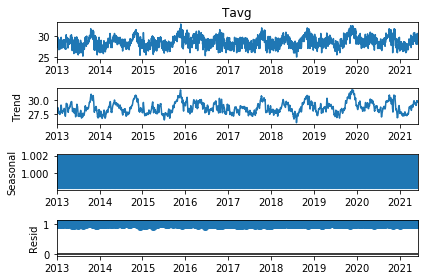

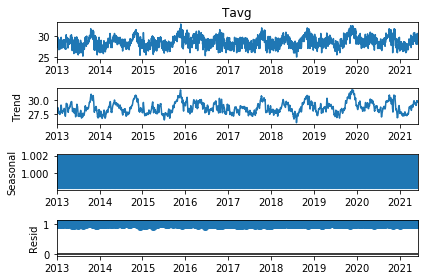

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_a = seasonal_decompose(df_Tavg['Tavg'], model='multiplicative')
result_a.plot()

In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_Tavg['Tavg'], order=(1,0,1), seasonal_order=(2,1,0,6))

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [45]:
model_fit = model.fit()

In [46]:
output = model_fit.forecast()
output

2021-06-01    29.378207
Freq: D, dtype: float64

In [47]:
pred1 = model_fit.forecast(28)
pred1

2021-06-01    29.378207
2021-06-02    29.571670
2021-06-03    28.898530
2021-06-04    29.716543
2021-06-05    29.595245
2021-06-06    29.219911
2021-06-07    29.545608
2021-06-08    29.778914
2021-06-09    28.730297
2021-06-10    29.898890
2021-06-11    29.595016
2021-06-12    29.596492
2021-06-13    29.768168
2021-06-14    29.847565
2021-06-15    28.579368
2021-06-16    30.067376
2021-06-17    29.368304
2021-06-18    29.376455
2021-06-19    29.568119
2021-06-20    29.735094
2021-06-21    28.732728
2021-06-22    29.897855
2021-06-23    29.516432
2021-06-24    29.397414
2021-06-25    29.626229
2021-06-26    29.786171
2021-06-27    28.681747
2021-06-28    29.953659
Freq: D, dtype: float64

Forecast for Minimum Temperature

In [48]:
df_Tn.index = df_Tn['Tanggal']

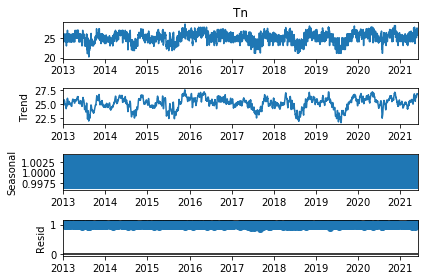

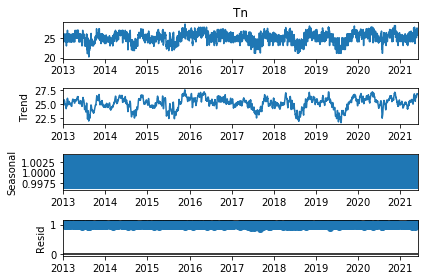

In [49]:
result_b = seasonal_decompose(df_Tn['Tn'], model='multiplicative')
result_b.plot()

In [50]:
model = SARIMAX(df_Tn['Tn'], order=(2,1,2), seasonal_order=(1,1,0,12))

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [51]:
model_fit = model.fit()

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [52]:
pred2 = model_fit.forecast(28)
pred2

2021-06-01    25.099514
2021-06-02    24.667889
2021-06-03    25.892758
2021-06-04    25.769477
2021-06-05    26.677913
2021-06-06    26.640375
2021-06-07    27.069816
2021-06-08    27.203776
2021-06-09    26.264171
2021-06-10    25.873227
2021-06-11    26.459078
2021-06-12    26.576560
2021-06-13    25.824454
2021-06-14    24.928463
2021-06-15    25.985602
2021-06-16    26.024682
2021-06-17    26.507696
2021-06-18    26.950332
2021-06-19    27.273181
2021-06-20    27.343653
2021-06-21    26.153829
2021-06-22    25.886302
2021-06-23    26.537404
2021-06-24    26.630527
2021-06-25    25.464337
2021-06-26    24.849540
2021-06-27    25.917396
2021-06-28    25.945431
Freq: D, dtype: float64

Forecast for Maximum Temperature

In [53]:
df_Tx.index = df_Tx['Tanggal']

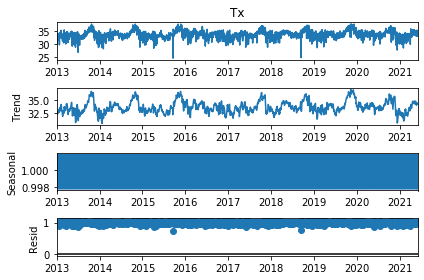

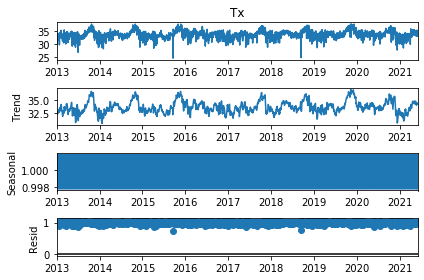

In [54]:
result_c = seasonal_decompose(df_Tx['Tx'], model='multiplicative')
result_c.plot()

In [55]:
model = SARIMAX(df_Tx['Tx'], order=(2,2,1), seasonal_order=(1,1,0,6))

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [56]:
model_fit = model.fit()

In [57]:
pred3 = model_fit.forecast(28)
pred3

2021-06-01    33.530991
2021-06-02    33.835709
2021-06-03    33.657976
2021-06-04    33.664222
2021-06-05    33.293397
2021-06-06    33.956461
2021-06-07    33.421175
2021-06-08    33.466571
2021-06-09    33.279131
2021-06-10    33.787707
2021-06-11    32.593742
2021-06-12    33.275699
2021-06-13    32.925523
2021-06-14    33.101891
2021-06-15    32.919458
2021-06-16    33.174473
2021-06-17    32.396248
2021-06-18    33.068756
2021-06-19    32.625197
2021-06-20    32.735516
2021-06-21    32.550645
2021-06-22    32.933789
2021-06-23    31.945719
2021-06-24    32.623088
2021-06-25    32.226774
2021-06-26    32.370535
2021-06-27    32.186985
2021-06-28    32.505517
Freq: D, dtype: float64

Forecast for Average Humidity

In [64]:
df_RHavg.index = df_RHavg['Tanggal']

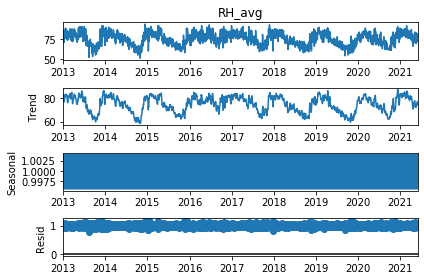

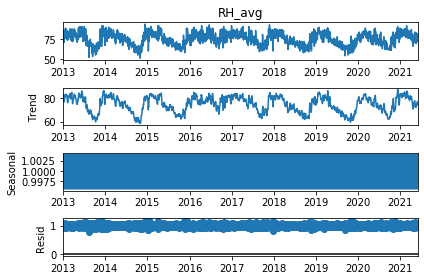

In [65]:
result_c = seasonal_decompose(df_RHavg['RH_avg'], model='multiplicative')
result_c.plot()

In [75]:
model = SARIMAX(df_RHavg['RH_avg'], order=(2,1,2), seasonal_order=(1,2,1,6))

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [76]:
model_fit = model.fit()

/home/aifajar/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [77]:
pred4 = model_fit.forecast(28)
pred4

2021-06-01    74.281649
2021-06-02    73.973214
2021-06-03    77.563351
2021-06-04    76.593474
2021-06-05    76.360893
2021-06-06    76.834613
2021-06-07    73.673584
2021-06-08    75.405917
2021-06-09    79.191719
2021-06-10    76.319361
2021-06-11    78.148997
2021-06-12    77.724967
2021-06-13    73.714444
2021-06-14    75.078997
2021-06-15    78.309769
2021-06-16    76.703588
2021-06-17    77.226274
2021-06-18    77.553530
2021-06-19    73.595478
2021-06-20    75.421784
2021-06-21    78.654879
2021-06-22    76.699242
2021-06-23    77.600331
2021-06-24    77.779865
2021-06-25    73.617503
2021-06-26    75.403274
2021-06-27    78.508312
2021-06-28    76.818162
Freq: D, dtype: float64

In [93]:
pred1.to_csv('prediction_dataset.csv')

In [97]:
pred1

2021-06-01    29.378207
2021-06-02    29.571670
2021-06-03    28.898530
2021-06-04    29.716543
2021-06-05    29.595245
2021-06-06    29.219911
2021-06-07    29.545608
2021-06-08    29.778914
2021-06-09    28.730297
2021-06-10    29.898890
2021-06-11    29.595016
2021-06-12    29.596492
2021-06-13    29.768168
2021-06-14    29.847565
2021-06-15    28.579368
2021-06-16    30.067376
2021-06-17    29.368304
2021-06-18    29.376455
2021-06-19    29.568119
2021-06-20    29.735094
2021-06-21    28.732728
2021-06-22    29.897855
2021-06-23    29.516432
2021-06-24    29.397414
2021-06-25    29.626229
2021-06-26    29.786171
2021-06-27    28.681747
2021-06-28    29.953659
Freq: D, dtype: float64

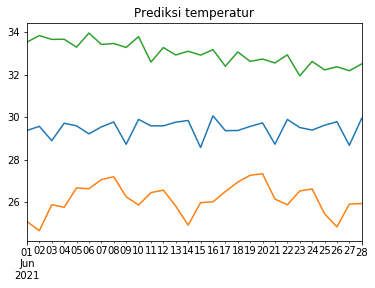

In [117]:
pred1.plot(title='Prediksi temperatur')
pred2.plot()
pred3.plot()

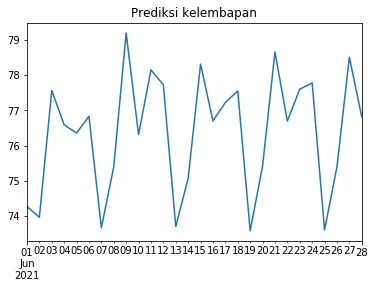

In [119]:
pred4.plot(title='Prediksi kelembapan')